# About dataset
**The "sonar.csv" dataset,contains sonar signals reflected off underwater objects. It consists of numerical features representing signal frequencies and patterns, with corresponding labels 'R' (Rock) and 'M' (Mine). This dataset is commonly used for binary classification tasks, such as distinguishing between rocks and mines in underwater environments.Logistic regression is suitable for this dataset because it effectively models the binary classification task of distinguishing between rocks and mines, making it a straightforward choice for this type of problem.**


## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

## Suppressing warnings

In [2]:
warnings.filterwarnings("ignore")

## Load the dataset

In [3]:
df = pd.read_csv('sonar.csv')

## Display the first five rows of the dataset

In [4]:
df.head(5)

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


## Display the last five rows of the dataset

In [5]:
df.tail(5)

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M
206,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,...,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,M


## Get the shape of the dataset (number of rows and columns)

In [6]:
df.shape

(207, 61)

## Check for missing values in the dataset

In [7]:
df.isnull().sum()

0.0200    0
0.0371    0
0.0428    0
0.0207    0
0.0954    0
         ..
0.0180    0
0.0084    0
0.0090    0
0.0032    0
R         0
Length: 61, dtype: int64

## Count the number of 'R' and 'M' values in the target column

In [8]:
df.iloc[:, 60].value_counts()

M    111
R     96
Name: R, dtype: int64

## Separating features (X) and target (y) variables

In [9]:
X = df.drop(columns=df.columns[60], axis=1)
y = df.iloc[:,60]

## Importing train_test_split from scikit-learn

In [10]:
from sklearn.model_selection import train_test_split

## Splitting the data into training and testing sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, stratify=y,random_state=105)

## Displaying the dimensions of the data splits

In [12]:
print(X.shape, X_train.shape, X_test.shape,y.shape, y_train.shape, y_test.shape)

(207, 60) (186, 60) (21, 60) (207,) (186,) (21,)


## Importing Logistic Regression from scikit-learn

In [13]:
from sklearn.linear_model import LogisticRegression

## Creating a Logistic Regression model

In [14]:
model = LogisticRegression()

## Fitting the model to the training data

In [15]:
model.fit(X_train, y_train)

LogisticRegression()

## Importing accuracy_score from scikit-learn

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, auc

## Making predictions on the test data

In [17]:
X_test_pre = model.predict(X_test)

# Calculating the accuracy on the test data

In [18]:
X_test_acc = accuracy_score(X_test_pre, y_test)

## Calculating the accuracy on the test data

In [19]:
print("Accuracy on test Data is:", X_test_acc)

Accuracy on test Data is: 0.8095238095238095


## Confusion Matrix

In [20]:
confusion = confusion_matrix(y_test, X_test_pre)

## Plotting the Confusion Matrix

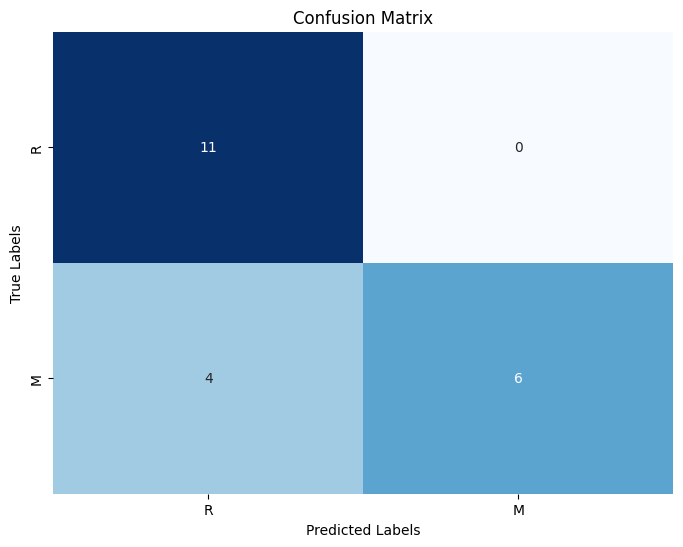

In [21]:
plt.figure(figsize=(8, 6)) #A heatmap of the confusion matrix is generated to visualize classification performance.
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['R', 'M'], yticklabels=['R', 'M']) 
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show() 

## ROC Curve
An ROC curve is plotted to illustrate the model's ability to discriminate between classes, showing true positive rate against false positive rate

In [22]:
y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test.map({'R': 0, 'M': 1}), y_prob)

## Calculate AUC

In [23]:
roc_auc = auc(fpr, tpr)

## Plot ROC Curve

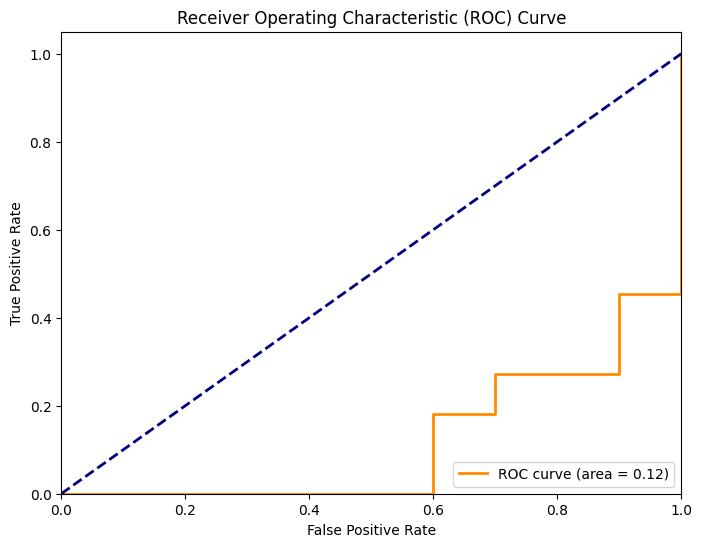

In [24]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Input data for prediction

In [25]:
input_data = (
    0.0114,0.0222,0.0269,0.0384,0.1217,0.2062,0.1489,0.0929,0.1350,0.1799,0.2486,
    0.2973,0.3672,0.4394,0.5258,0.6755,0.7402,0.8284,0.9033,0.9584,1.0000,0.9982,
    0.8899,0.7493,0.6367,0.6744,0.7207,0.6821,0.5512,0.4789,0.3924,0.2533,0.1089,
    0.1390,0.2551,0.3301,0.2818,0.2142,0.2266,0.2142,0.2354,0.2871,0.2596,0.1925,0.1256,0.1003,0.0951,0.1210,
    0.0728,0.0174,0.0213,0.0269,0.0152,0.0257,0.0097,0.0041,0.0050,0.0145,0.0103,0.0025
)


## Convert input data to a Numpy array

In [26]:
input_arr = np.asarray(input_data)

## Reshape the input data as we are predicting for one instance

In [27]:
reshape_arr = input_arr.reshape(1, -1)

## Make a prediction

In [28]:
prediction = model.predict(reshape_arr)

## Display the prediction

In [29]:
print(prediction)

['M']


## Determine the object type based on the prediction

In [30]:
if prediction[0] == "R":
    print("The object is Rock")
else:
    print("The object is Mine")


The object is Mine


**in conclusion we can say that Logistic regression excels in classifying underwater objects in the sonar dataset.**